### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

##### Below code finds all the columns that have missing values and givbe their count

In [4]:
# Check for columns missing values
missing_values = data.isnull().sum()

# Display columns that have missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

#### Now we know what all columns are missing values, lets do some cleanup. 
1. Car column has too many missing values to have any impact on our analysis. Lets drop it.
2. For all other columns with missing values lets assign 'No response' to the balnk values.

In [5]:
# Drop the 'car' column due to the large number of missing values
data_cleaned = data.drop(columns=['car'])

# Replace missing values with 'No response' in the specified columns
columns_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_to_fill:
    data_cleaned[column].fillna('No response', inplace=True)

# Verify the first few rows of the cleaned data
#print(data_cleaned.head())

# Check for any remaining missing values
missing_values_cleaned = data_cleaned.isnull().sum()
print(missing_values_cleaned[missing_values_cleaned > 0])

data_cleaned.head()

Series([], dtype: int64)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,No response,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,No response,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,No response,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,No response,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,No response,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



#### Below code calcultes the percentage of coupons accepted vs not accepted and depicts as a pie chart.
#### It seems like 57% of people accepted the offered coupons while 43% rejected.


Total observations:12684
Number of accepted coupons: 7210
Proportion of accepted coupons: 0.57


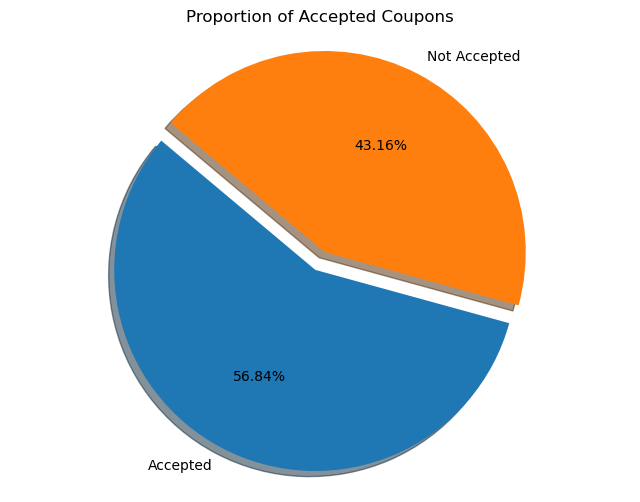

In [6]:
# Calculate the proportion of total observations that chose to accept the coupon
total_observations = len(data_cleaned)
accepted_coupons = data_cleaned['Y'].sum()
proportion_accepted = accepted_coupons / total_observations

print(f"\nTotal observations:"+str(total_observations))
print(f"Number of accepted coupons: {accepted_coupons}")
print(f"Proportion of accepted coupons: {proportion_accepted:.2f}")

# Create a pie chart to visualize the proportion of accepted coupons
labels = ['Accepted', 'Not Accepted']
sizes = [accepted_coupons, total_observations - accepted_coupons]
explode = (0.1, 0)  # explode the 1st slice (Accepted)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels,  autopct='%1.2f%%',
        shadow=True, startangle=140)
plt.title('Proportion of Accepted Coupons')
plt.axis('equal') 
plt.show()

5. Use a bar plot to visualize the `coupon` column.

#### below code generates a count plot showing the count of different types of coupon offered.
#### Seems like highest number of coupons were for coffee House. 

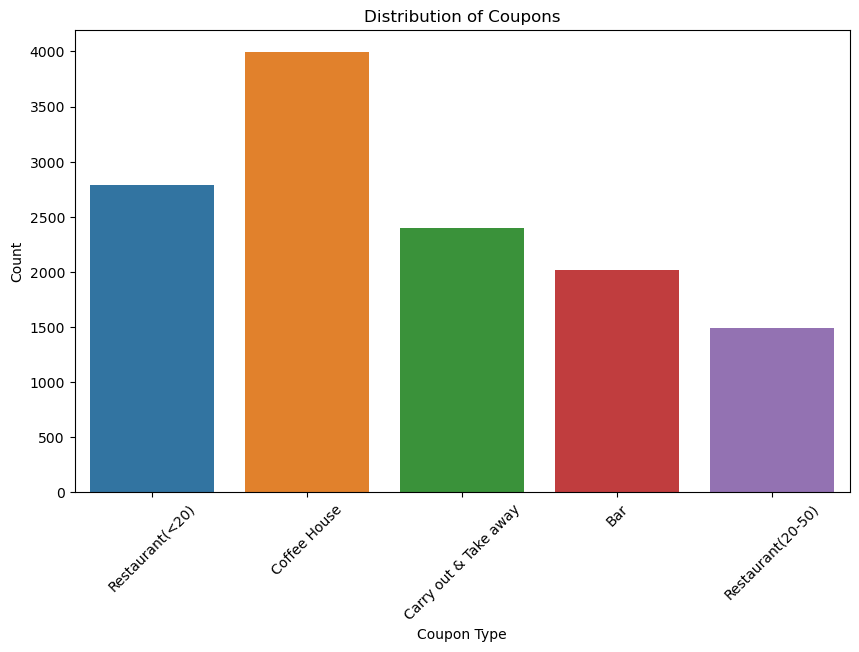

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data_cleaned)
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

#### Below code generates a histogram og outside temeprature when coupons were offered .
#### There are only three values (30, 55, 80)

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


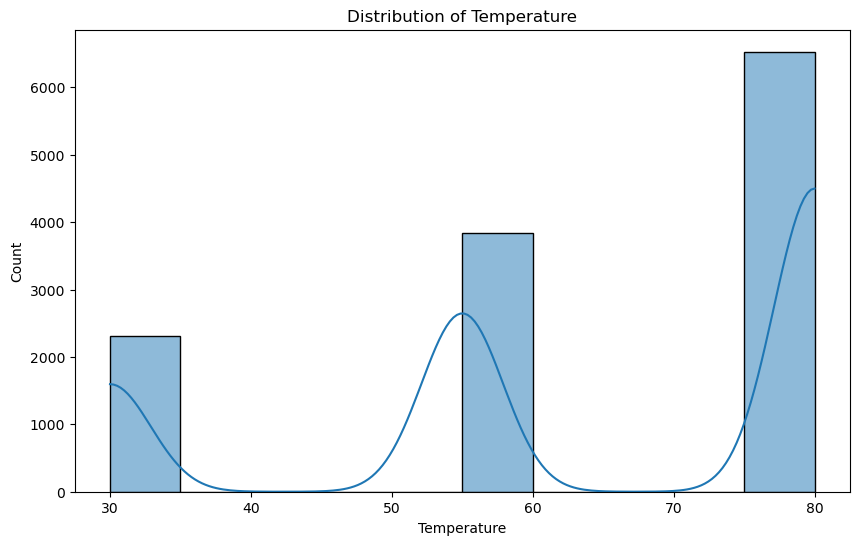

In [8]:
data_cleaned['temperature'] = pd.to_numeric(data_cleaned['temperature'])

# Plot the distribution of the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']


print(bar_coupons_df.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse    CarryAway  \
9   Female  21  Unmarried partner  ...        never  No response   
13  Female  21  Unmarried partner  ...        never  No response   
17  Female  21  Unmarried partner  ...        never  No response   
24    Male  21             Single  ...        less1          4~8   
35    Male  21             Single  ...        less1          4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              

2. What proportion of bar coupons were accepted?


#### below finds out total bar coupons offered , number of them accepted and then divide these two to find the proportion of accepted .
#### the final result is below:-
Total bar coupons: 2017
Accepted bar coupons: 827
Proportion of accepted bar coupons: 0.41

In [10]:
total_bar_coupons = len(bar_coupons_df)
accepted_bar_coupons = bar_coupons_df['Y'].sum()
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons

# Print the results
print(f"Total bar coupons: {total_bar_coupons}")
print(f"Accepted bar coupons: {accepted_bar_coupons}")
print(f"Proportion of accepted bar coupons: {proportion_accepted_bar_coupons:.2f}")

Total bar coupons: 2017
Accepted bar coupons: 827
Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


### Bar plot below shows the the acceptance rate of people who visit bar less than 3 times a month vs more than three times. 
#### Acceptance rate of less than 3 is 53 and acceptance rate of greater than 3 is 77 percent. Both are higher than overall percent of 41. It seems like people who visit the bar  are more likely to accept the bar coupon. More the frequency of their visit more likely they will accept.

Total bar coupons (3 or fewer times a month): 967
Accepted bar coupons (3 or fewer times a month): 510
Acceptance rate (3 or fewer times a month): 0.53
Total bar coupons (more than 3 times a month): 199
Accepted bar coupons (more than 3 times a month): 153
Acceptance rate (more than 3 times a month): 0.77


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


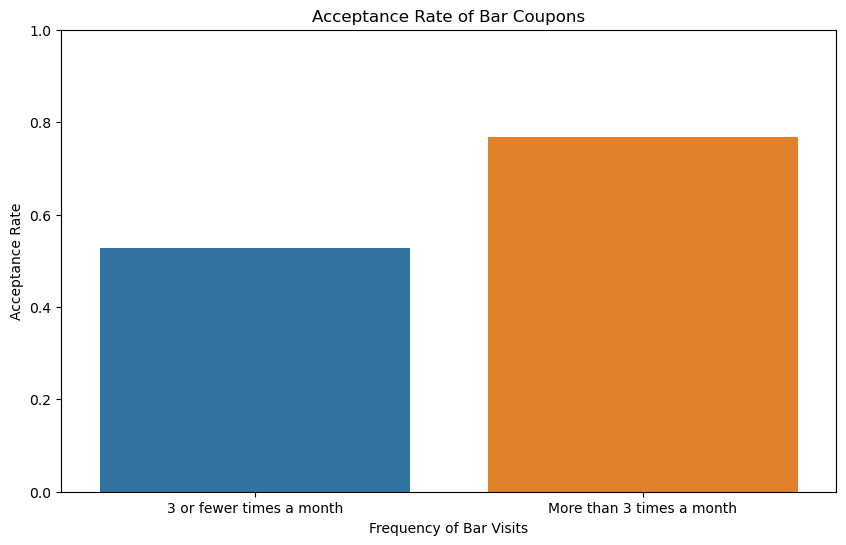

In [12]:
# Separate those who went to a bar 3 or fewer times a month and those who went more
bar_3_or_fewer = bar_coupons_df[bar_coupons_df['Bar'].isin(['0', '1~3', 'less1'])]
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for each group
total_bar_3_or_fewer = len(bar_3_or_fewer)
accepted_bar_3_or_fewer = bar_3_or_fewer['Y'].sum()
acceptance_rate_3_or_fewer = accepted_bar_3_or_fewer / total_bar_3_or_fewer

total_bar_more_than_3 = len(bar_more_than_3)
accepted_bar_more_than_3 = bar_more_than_3['Y'].sum()
acceptance_rate_more_than_3 = accepted_bar_more_than_3 / total_bar_more_than_3

# Print the results
print(f"Total bar coupons (3 or fewer times a month): {total_bar_3_or_fewer}")
print(f"Accepted bar coupons (3 or fewer times a month): {accepted_bar_3_or_fewer}")
print(f"Acceptance rate (3 or fewer times a month): {acceptance_rate_3_or_fewer:.2f}")

print(f"Total bar coupons (more than 3 times a month): {total_bar_more_than_3}")
print(f"Accepted bar coupons (more than 3 times a month): {accepted_bar_more_than_3}")
print(f"Acceptance rate (more than 3 times a month): {acceptance_rate_more_than_3:.2f}")

# Create a bar plot to depict the acceptance rates
categories = ['3 or fewer times a month', 'More than 3 times a month']
acceptance_rates = [acceptance_rate_3_or_fewer, acceptance_rate_more_than_3]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=acceptance_rates)
plt.title('Acceptance Rate of Bar Coupons')
plt.xlabel('Frequency of Bar Visits')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


                             category  count   sum  acceptance_rate
0  More than once a month and over 25   2777  1726         0.621534
1                              Others   9907  5484         0.553548


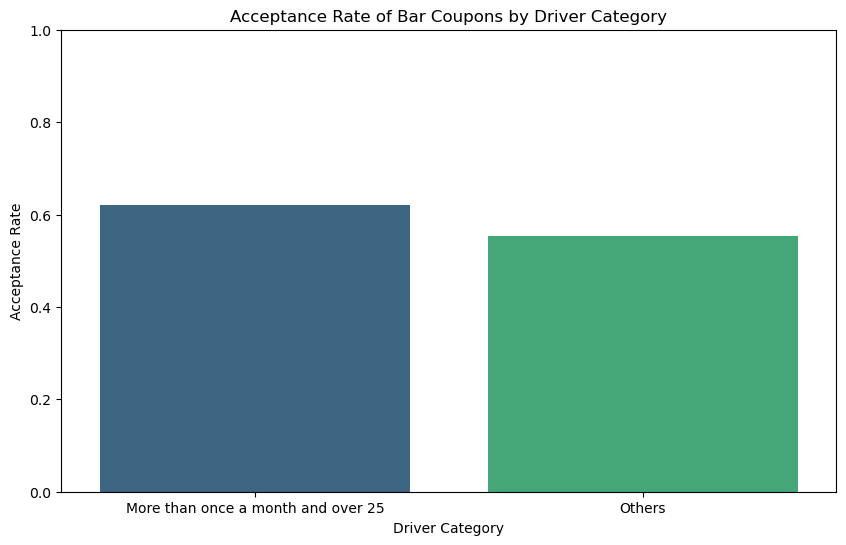

In [13]:
# Create a new column to categorize drivers based on their bar visit frequency and age
data_cleaned['category'] = data_cleaned.apply(
    lambda row: 'More than once a month and over 25' if (
        row['Bar'] in ['1~3', '4~8', 'gt8'] and row['age'] not in ['below21', '21']
    ) else 'Others', axis=1
)

# Group the data by the new category and calculate the acceptance rate for each group
grouped_data = data_cleaned.groupby('category')['Y'].agg(['count', 'sum']).reset_index()
grouped_data['acceptance_rate'] = grouped_data['sum'] / grouped_data['count']

# Print the results
print(grouped_data)

# Create a bar plot to depict the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='acceptance_rate', data=grouped_data, palette='viridis')
plt.title('Acceptance Rate of Bar Coupons by Driver Category')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


                                            category  count   sum  \
0  More than once a month, no kids, non-farming/f...   3696  2303   
1                                             Others   8988  4907   

   acceptance_rate  
0         0.623106  
1         0.545950  


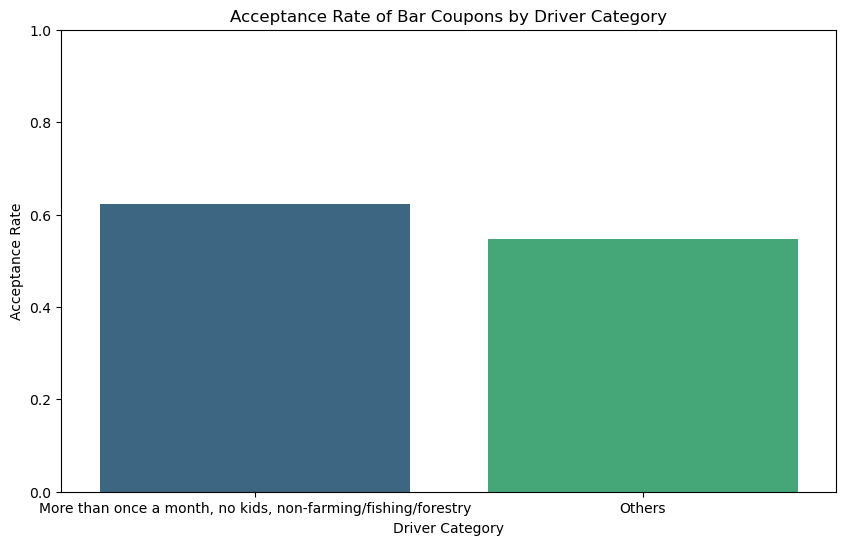

In [14]:
data_cleaned['category'] = data_cleaned.apply(
    lambda row: 'More than once a month, no kids, non-farming/fishing/forestry' if (
        row['Bar'] in ['1~3', '4~8', 'gt8'] and
        row['passanger'] != 'Kid(s)' and
        row['occupation'] not in ['farming', 'fishing', 'forestry']
    ) else 'Others', axis=1
)

# Group the data by the new category and calculate the acceptance rate for each group
grouped_data = data_cleaned.groupby('category')['Y'].agg(['count', 'sum']).reset_index()
grouped_data['acceptance_rate'] = grouped_data['sum'] / grouped_data['count']

# Print the results
print(grouped_data)

# Create a bar plot to depict the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='acceptance_rate', data=grouped_data, palette='viridis')
plt.title('Acceptance Rate of Bar Coupons by Driver Category')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



  category  count   sum  acceptance_rate
0  Group 1   3696  2303         0.623106
1  Group 2     40    29         0.725000
2  Group 3   1110   617         0.555856
3   Others   7838  4261         0.543634


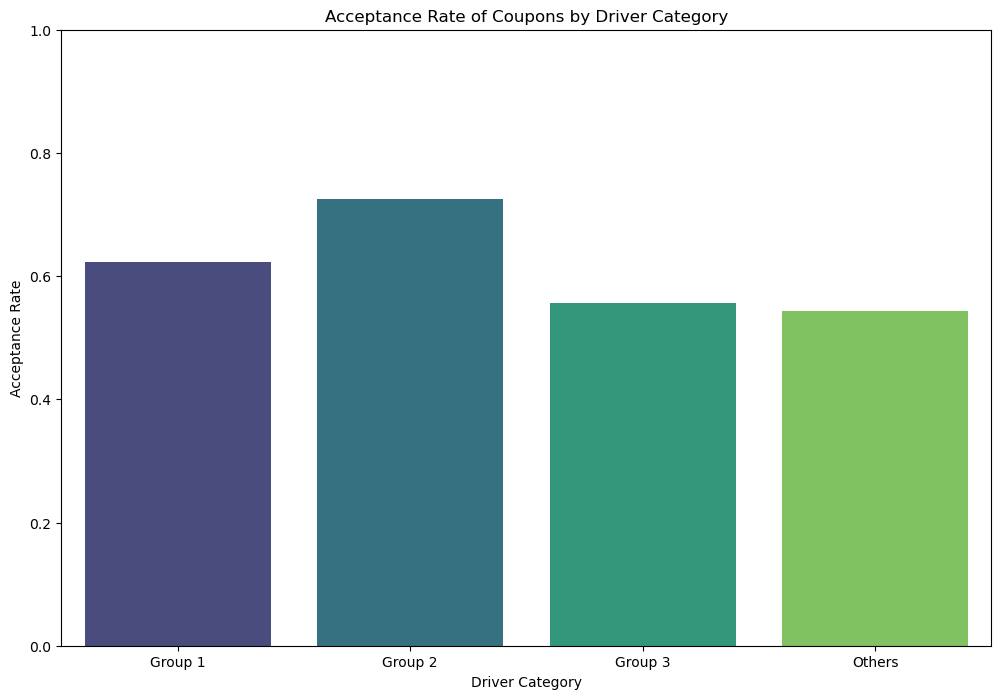

In [13]:
income_mapping = {
    'less than $12500': 1, '$12500 - $24999': 2, '$25000 - $37499': 3, 
    '$37500 - $49999': 4, '$50000 - $62499': 5, '$62500 - $74999': 6, 
    '$75000 - $87499': 7, '$87500 - $99999': 8, '$100000 or more': 9
}
data_cleaned['income_numeric'] = data_cleaned['income'].map(income_mapping)

# Categorize drivers based on the provided criteria
data_cleaned['category'] = data_cleaned.apply(
    lambda row: 'Group 1' if (
        row['Bar'] in ['1~3', '4~8', 'gt8'] and 
        row['passanger'] != 'Kid(s)' and 
        row['maritalStatus'] != 'Widowed'
    ) else 'Group 2' if (
        row['Bar'] in ['1~3', '4~8', 'gt8'] and 
        row['age'] in ['below21', '21', '26']
    ) else 'Group 3' if (
        row['RestaurantLessThan20'] in ['4~8', 'gt8'] and 
        row['income_numeric'] <= 4
    ) else 'Others', axis=1
)

# Group the data by the new category and calculate the acceptance rate for each group
grouped_data = data_cleaned.groupby('category')['Y'].agg(['count', 'sum']).reset_index()
grouped_data['acceptance_rate'] = grouped_data['sum'] / grouped_data['count']

# Print the results
print(grouped_data)

# Create a bar plot to depict the acceptance rates
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='acceptance_rate', data=grouped_data, palette='viridis')
plt.title('Acceptance Rate of Coupons by Driver Category')
plt.xlabel('Driver Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. People who are under the age of 30 and go to bar more than once a month have highest acceptance rate of 73 %.  Important thing to note here is that it is greater than "bars more than once a month, had passengers that were not a kid, and were not widowed" . So it seems like being uder 30 has high impact on acceptance of bar coupon. Also people under 30 are liky to not have kids and are not widowed, so those factors are nullified.
2. Third group "go to cheap restaurants more than 4 times a month and income is less than 50K." has the lowest acceptance rate of 55 which is almost equal to all others at 54%. This means that number of times a person visit cheap restaurant and inocome might not have significant impact on weather a bar coupon is accepted or not. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Exploring coupons for expensive restaurants (Restaurant(20-50))
I have tried to explore the coupons Restaurant(20-50) and see what all foactors influence their acceptance and rejection . 
#### Factors considered :-
'age', 'gender', 'maritalStatus', 'income', 'passanger', 'coupon', 'Bar', 'CoffeeHouse', 'CarryAway', 'Restaurant20To50', 'destination', 'weather', 'temperature', 'time', 'expiration', 'has_children'
#### Code :-
##### Data Cleanup
car column is dropped as there are too many blanks.
For all other columns containing blanks , I have assigned 'No response'
Converted temprature column to numeric .

##### Plotting
A bar plot is created for all factors we want to study showing the acceptance percentage for each value in that column .
Columns are sorted where it makes sence like time, age , income etc. They all increase from left to right.
All graphs are shown in one grid.

### Analysis
Lets observe each plot and see what we can conclude. 
#### Age
Acceptance rate is quite similar from below 21 to 46 . It falls for age group of 50 plus . This is suprising because older age people are more likely to go to expensive restaurant. This is something we can explore further. 
#### Gender
Not much difference in acceptance rate for both genders . We can conclude it has no impact.
#### Marital Status
Seems like Widowed and Divorced have much higher rejection rate and unmarried partner having the highestr acceptance. This is some thing we should explore further if there are other factors influencing this result. 
#### Income 
Do not see any real patternt here . The acceptance rate is fluctuating across income groups.
#### Passenger
Acceptance rate is quite high when partner is the passenger and opposite when there is a kid. Another item that can be explored further. 
#### Destination
Destination graph seems as expected. People are more likely to accept coupon when they are not goinmg to any urgent place than to home and evel less likely to accept when going for work. Does coupon duration has any impact here ?
#### Weather and temprature 
People are more likely to accept coupon on a sunny day than rainy or snowy day . For temprature as expected acceptance rate increases as temprature rises.
#### time
Best time for coupon acceptance seems to 10 to 2 . Later or early it gets from these the acdceptance rate seems to be declining .
#### Has children 
No impact
#### Frequency of expensinve restaurant visits (Restaurant20To50)
There seem to be steady increase in acceptance rate as number of restaurant visits increase . We can conclude that more the people visit the restaurant more likely the yare to accept the coupon
#### Expiration
Clearly 1d coupons are more likely to be accpeted than 2h. It should be good to know what conditions are best to offer two hour coups 


Summary Statistics:
       destination passanger weather temperature  time             coupon  \
count         1492      1492    1492        1492  1492               1492   
unique           3         4       3           3     5                  1   
top           Home     Alone   Sunny          80   7AM  Restaurant(20-50)   
freq           653      1009    1247         851   429               1492   
mean           NaN       NaN     NaN         NaN   NaN                NaN   
std            NaN       NaN     NaN         NaN   NaN                NaN   
min            NaN       NaN     NaN         NaN   NaN                NaN   
25%            NaN       NaN     NaN         NaN   NaN                NaN   
50%            NaN       NaN     NaN         NaN   NaN                NaN   
75%            NaN       NaN     NaN         NaN   NaN                NaN   
max            NaN       NaN     NaN         NaN   NaN                NaN   

       expiration  gender   age    maritalStatus  ... C

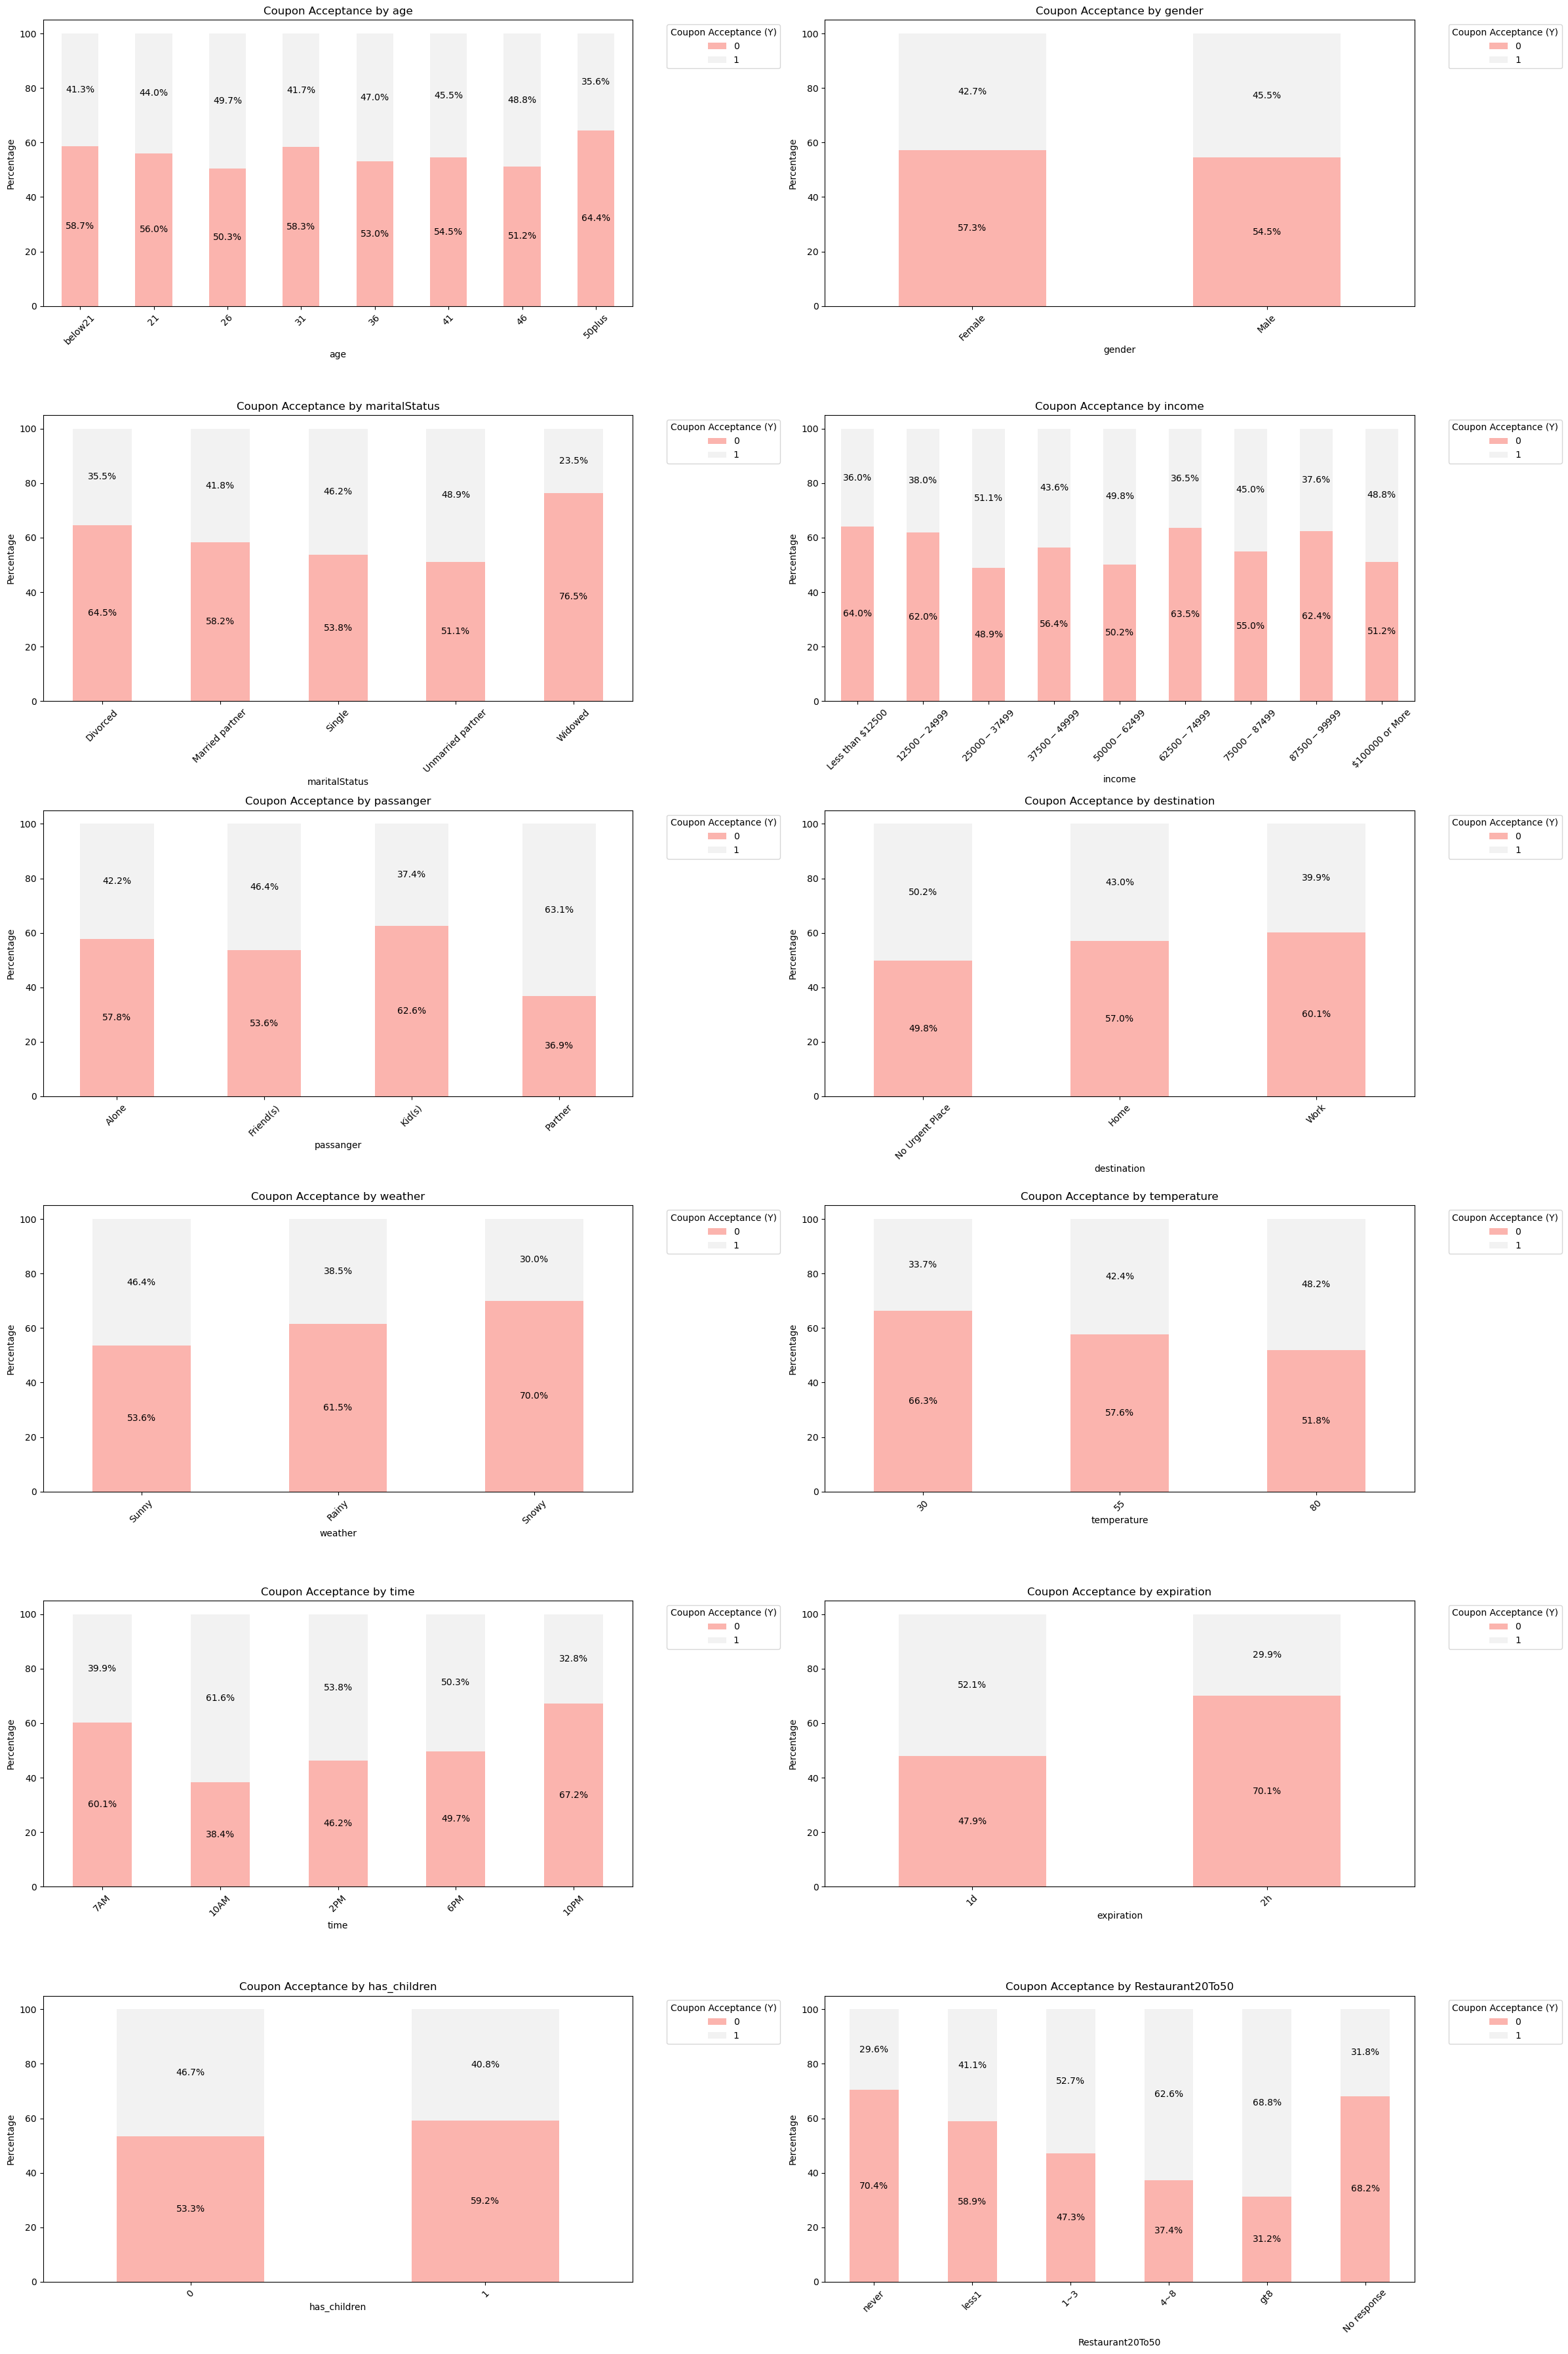

In [16]:

import warnings

# Suppress future warnings and SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)



# Drop the 'car' column due to the large number of missing values
data_cleaned = data.drop(columns=['car'])

# Replace missing values with 'No response' in the specified columns
columns_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_to_fill:
    data_cleaned[column].fillna('No response', inplace=True)

# Convert temperature to numeric if it's not already
data_cleaned['temperature'] = pd.to_numeric(data_cleaned['temperature'], errors='coerce')

# Convert relevant columns to strings
categorical_columns = ['age', 'gender', 'maritalStatus', 'income', 'passanger', 'coupon', 
                       'Bar', 'CoffeeHouse', 'CarryAway', 
                       'Restaurant20To50', 'destination', 'weather', 'temperature', 
                       'time', 'expiration', 'has_children']
for column in categorical_columns:
    data_cleaned[column] = data_cleaned[column].astype(str)

# Create separate DataFrame for 'Restaurant(20-50)' coupons
df_restaurant_20to50 = data_cleaned[data_cleaned['coupon'] == 'Restaurant(20-50)']

# Summary statistics
print("Summary Statistics:")
print(df_restaurant_20to50.describe(include='all'))

# Function to create bar plots for categorical variables with percentages and labels
def plot_categorical_percentage(ax, df, column, order=None):
    if order:
        df[column] = pd.Categorical(df[column], categories=order, ordered=True)
    count_data = df.groupby([column, 'Y']).size().unstack().fillna(0)
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
    percentage_data.plot(kind='bar', stacked=True, ax=ax, colormap='Pastel1')
    ax.set_title(f'Coupon Acceptance by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.legend(title='Coupon Acceptance (Y)', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adding percentage labels
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 0),
                        textcoords='offset points')

# List of columns to plot with specific orders
columns_to_plot = {
    'age': ['below21', '21', '26', '31', '36', '41', '46', '50plus'],
    'gender': None,
    'maritalStatus': None,
    'income': ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'],
    'passanger': None,
    'destination': ['No Urgent Place', 'Home', 'Work'],
    'weather': ['Sunny', 'Rainy', 'Snowy'],
    'temperature': None,
    'time': ['7AM', '10AM', '2PM', '6PM', '10PM'],
    'expiration': None,
    'has_children': None,
    'Restaurant20To50': ['never', 'less1', '1~3', '4~8', 'gt8', 'No response']
}

# Create a grid of plots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(24, 36))  # Increase figsize for larger plots
axes = axes.flatten()

# Plot each column
for ax, (column, order) in zip(axes, columns_to_plot.items()):
    plot_categorical_percentage(ax, df_restaurant_20to50.copy(), column, order)

# Remove any empty subplots
for ax in axes[len(columns_to_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


##### Now lets furthur explore questions that come up from our previous analysis
1. Widowed and Divorced have much higher rejection rate and unmarried partner having the highest acceptance rate. Are there any other factors affecting this ?
2. Acceptance rate is quite similar from below 21 to 46 . It falls for age group of 50 plus . why is that ?
3. Acceptance rate is quite high when partner is the passenger and opposite when there is a kid. why ?
4. Identify best conditions to offer two hour coupons.

### Widowed and Divorced have much higher rejection rate and unmarried partner having the highest acceptance rate. Are there any other factors affecting this ?
Lets compare widowed and Divorced with unmaried partner based on destination, income and age.
##### Destination
Count plot below shows that majority widowed and Divorced custmer were offered coupons when they were going to work or home but for unmarried partner maximum coupons were when travelling to 'no urgent place' .  This has impact on the acceptance rate as 'no urgent place' overall has high acceptance rrate.
##### Income 
Majority of Divorced and Widowed fall in less than 37500 categotry where as unmarried partner has presence in all categories. Lower income group is less likely to visit expensive restaurant.
##### age
Divorced and Widowed only fall in 31 or greater categories and maximum are in 50 plus which has lowest exceptance rate. On the other hand unmarried partner majority lies in under 31 which has healthy acceptance rare ann very few in 50 plus. 

### Conclusion
It seems like Marital status of widowed and Divorced on itself does not drive the decision of acceptance of coupon but in data collected majority widowed and Divorced fall in certain categories that have high impact on  decision of acceptance of coupon like destination, income group and age. 


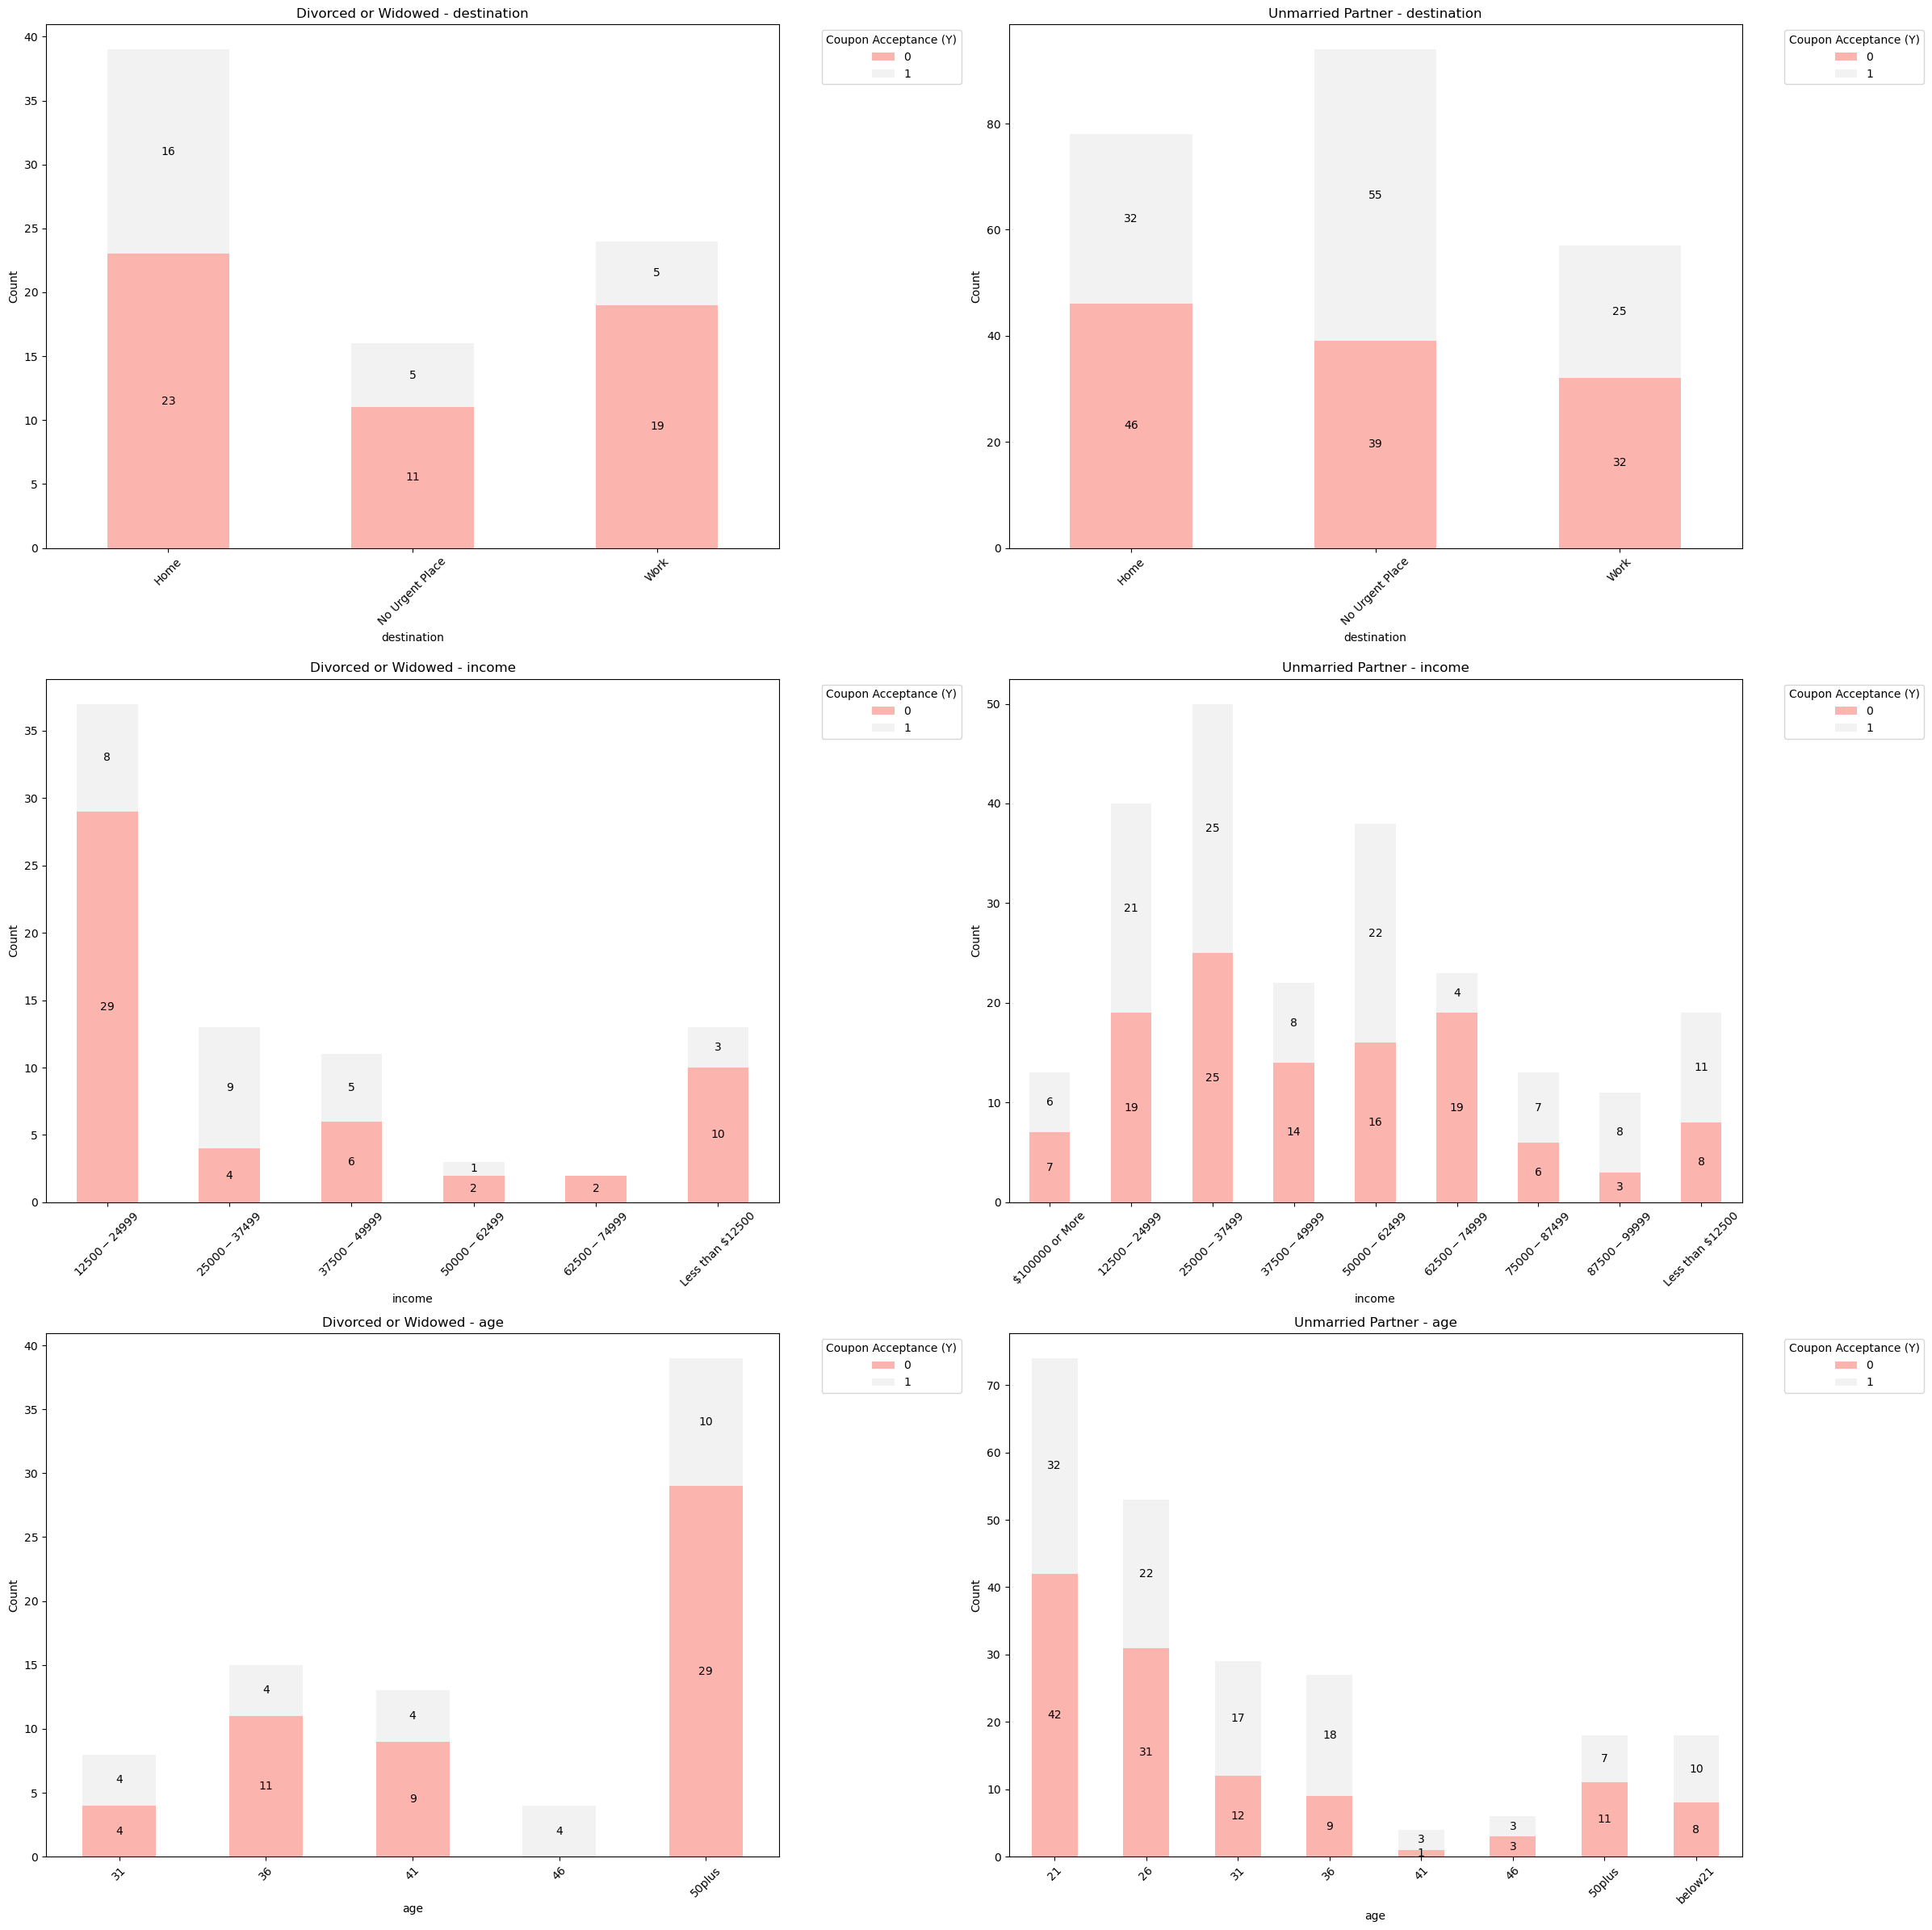

In [36]:


# Filter data for 'Restaurant(20-50)' coupon and marital status 'Divorced' or 'Widowed'
df_divorced_widowed = data_cleaned[(data_cleaned['coupon'] == 'Restaurant(20-50)') & 
                                   (data_cleaned['maritalStatus'].isin(['Divorced', 'Widowed']))]

# Filter data for 'Restaurant(20-50)' coupon and marital status 'Unmarried partner'
df_unmarried_partner = data_cleaned[(data_cleaned['coupon'] == 'Restaurant(20-50)') & 
                                    (data_cleaned['maritalStatus'] == 'Unmarried partner')]



# Function to create bar plots for categorical variables with counts and labels
def plot_categorical_count(ax, df, column, title, order=None):
    if order:
        df.loc[:, column] = pd.Categorical(df[column], categories=order, ordered=True)
    count_data = df.groupby([column, 'Y']).size().unstack().fillna(0)
    count_data.plot(kind='bar', stacked=True, ax=ax, colormap='Pastel1')
    ax.set_title(f'{title} - {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Coupon Acceptance (Y)', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adding count labels
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 0),
                        textcoords='offset points')

# Function to create bar plots for categorical variables with percentages and labels
def plot_categorical_percentage(ax, df, column, title, order=None):
    if order:
        df.loc[:, column] = pd.Categorical(df[column], categories=order, ordered=True)
    count_data = df.groupby([column, 'Y']).size().unstack().fillna(0)
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
    percentage_data.plot(kind='bar', stacked=True, ax=ax, colormap='Pastel1')
    ax.set_title(f'{title} - {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.legend(title='Coupon Acceptance (Y)', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adding percentage labels
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 0),
                        textcoords='offset points')

# List of columns to plot with specific orders
columns_to_plot = {
    'destination': ['No urgent place', 'Home', 'Work'],
    'income': ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'],
    'Restaurant20To50': ['never', 'less1', '1~3', '4~8', 'gt8', 'No response'],
    'expiration': None,
    'age': ['below21', '21', '26', '31', '36', '41', '46', '50plus'],
}

# Create a grid of plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))  # Adjusted for the number of plots
axes = axes.flatten()

# Plot count graphs for divorced/widowed
plot_categorical_count(axes[0], df_divorced_widowed, 'destination', 'Divorced or Widowed')

# Plot count graphs for unmarried partner
plot_categorical_count(axes[1], df_unmarried_partner, 'destination', 'Unmarried Partner')


plot_categorical_count(axes[2], df_divorced_widowed, 'income', 'Divorced or Widowed')


plot_categorical_count(axes[3], df_unmarried_partner, 'income', 'Unmarried Partner')

plot_categorical_count(axes[4], df_divorced_widowed, 'age', 'Divorced or Widowed')


plot_categorical_count(axes[5], df_unmarried_partner, 'age', 'Unmarried Partner')

plt.tight_layout()
plt.show()


2. Acceptance rate is quite similar from below 21 to 46 . It falls for age group of 50 plus . why is that ?
3. Acceptance rate is quite high when partner is the passenger and opposite when there is a kid. why ?
4. Identify best conditions to offer two hour coupons.
## To be continiud 